In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [12]:
X = df[['Age','Fare']]
Y = df['Survived']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [14]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [15]:
x_train

,Age,Fare,Age_imputed
759,33.0,86.5000,33.0
733,23.0,13.0000,23.0
143,19.0,6.7500,19.0
423,28.0,14.4000,28.0
410,NaN,7.8958,NaN
...,...,...,...
485,NaN,25.4667,NaN
866,27.0,13.8583,27.0
28,NaN,7.8792,NaN
134,25.0,13.0000,25.0


In [24]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age_imputed'].isnull().sum()).values

In [26]:
x_train['Age_imputed']

759    33.0
733    23.0
143    19.0
423    28.0
410    24.0
       ... 
485    60.0
866    27.0
28     32.0
134    25.0
136    19.0
Name: Age_imputed, Length: 712, dtype: float64

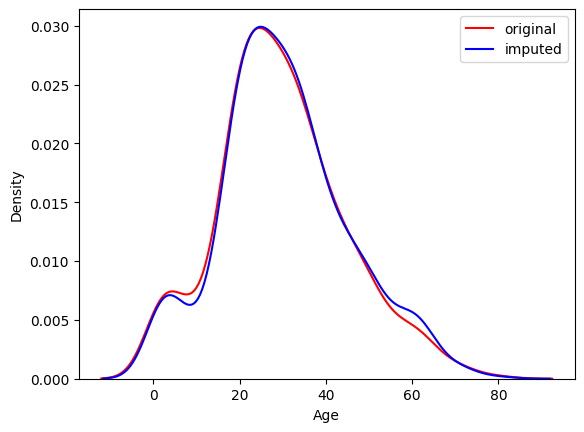

In [31]:
sns.kdeplot(x_train['Age'],label='original',color='red')
sns.kdeplot(x_train['Age_imputed'],label='imputed',color='blue')
plt.legend()

In [34]:
pko = ProfileReport(x_train)
pko.to_file(output_file='visualize.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\HP\anaconda3\envs\ML\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## for Variance

In [36]:
print("original age variance",x_train['Age'].var())
print("duplicated age variance",x_train['Age_imputed'].var())

original age variance 216.9270430411449
duplicated age variance 219.97049285228945


## for covariance

In [39]:
x_train.cov()

,Age,Fare,Age_imputed
Age,216.927043,65.962850,216.927043
Fare,65.962850,2448.754911,49.660581
Age_imputed,216.927043,49.660581,219.970493


## Outliers

<AxesSubplot: >

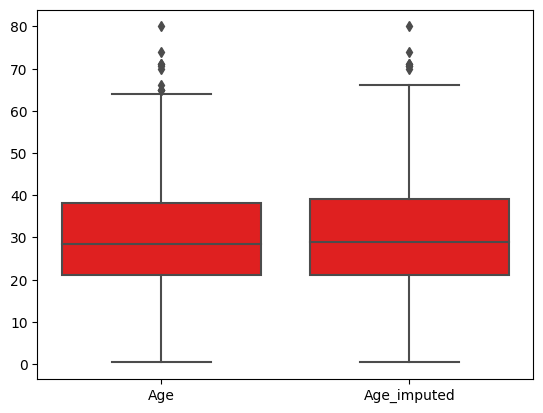

In [49]:
sns.boxplot(x_train[['Age','Age_imputed']],color='red')

